In [2]:
import numpy as np
import magpylib as magpy
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

In [2]:
mu0 = 4*np.pi*1e-7 # T*m/A
gamma_h = 42.5756  # MHz/T
b_z_earth = 65E-6 # T
rho_c = 1.678E-8  # ohm*m

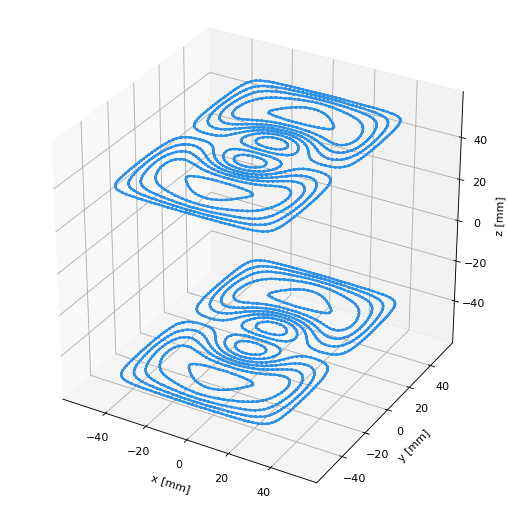

In [8]:
paths = []

I = 4

for i in range(28):
    paths.append(np.loadtxt(f"paths/{i}.txt")[::2])

coils = []

for p in paths:
    coils.append(magpy.current.Line(I, p))

tot_coil = coils[0]

for c in coils[1:]:
    tot_coil+=c

tot_coil.show()

In [33]:
size = 100
ts = np.linspace(-45, 45, size)
X, Z = np.meshgrid(ts, ts)
gridxz = np.array([[(x,0,z) for x in ts] for z in ts])

Y, Z = np.meshgrid(ts, ts)
gridyz = np.array([[(0,y,z) for y in ts] for z in ts])

In [34]:
Bxz = tot_coil.getB(gridxz)
Byz = tot_coil.getB(gridyz)

In [35]:
sens1 = magpy.Sensor((0, 0, 5))
sens2 = magpy.Sensor((0, 0, -5))
By_top = tot_coil.getB(sens1)[1]
By_bot = tot_coil.getB(sens2)[1]

dbdz = (By_top-By_bot)/10.
grad_xz = gridxz[:,:,2]*dbdz
grad_xz.shape

grad_yz = gridxz[:,:,2]*dbdz
grad_yz.shape

(100, 100)

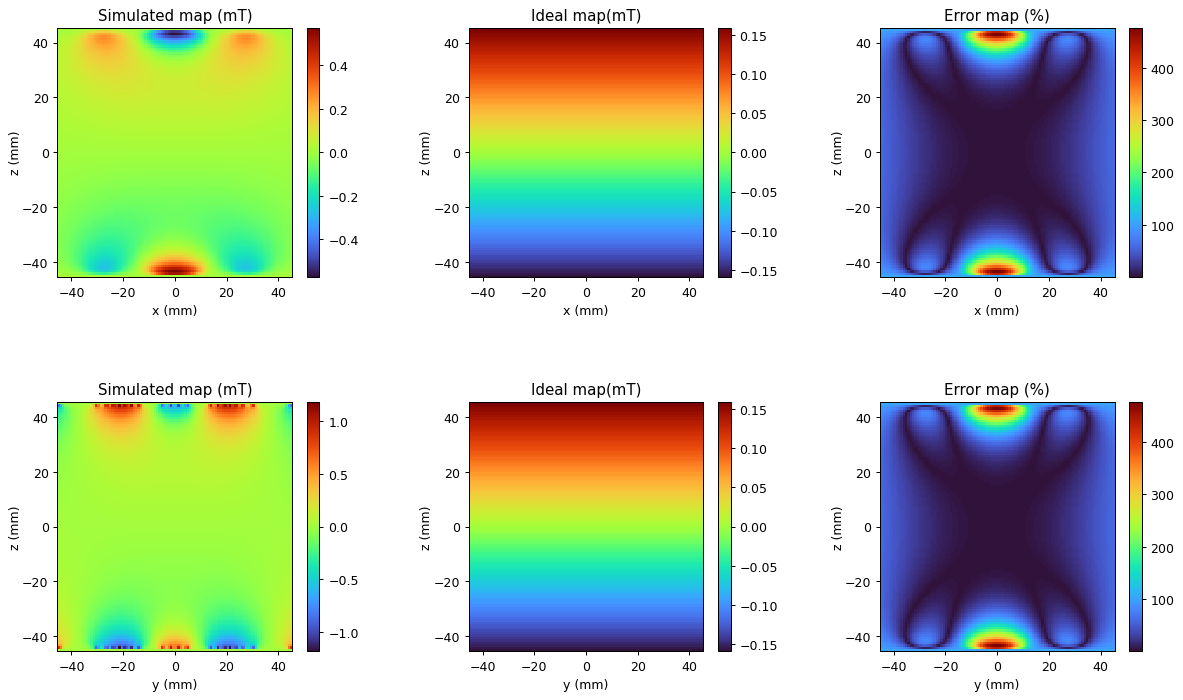

In [38]:
fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(2, 3, 1)

# XZ plane
p = plt.pcolormesh(X, Z, Bxz[:,:,1], cmap="turbo")
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=0.1)
plt.xlabel("x (mm)")
plt.title("Simulated map (mT)")

plt.subplot(2, 3, 2)
p = plt.pcolor(X, Z, grad_xz, cmap="turbo")
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=0.1)
plt.xlabel("x (mm)")
plt.title("Ideal map(mT)")

err_xz = np.abs((grad_xz-Bxz[:,:,1])/grad_xz)
plt.subplot(2, 3, 3)
p = plt.pcolor(X, Z, err_xz*100, cmap="turbo")
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=-0.2)
plt.xlabel("x (mm)")
plt.title("Error map (%)")

# YZ plane
plt.subplot(2, 3, 4)
p = plt.pcolormesh(Y, Z, Byz[:,:,1], cmap="turbo")
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=0.1)
plt.xlabel("y (mm)")
plt.title("Simulated map (mT)")

plt.subplot(2, 3, 5)
p = plt.pcolor(Y, Z, grad_yz, cmap="turbo")
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=0.1)
plt.xlabel("y (mm)")
plt.title("Ideal map(mT)")

err_yz = np.abs((grad_yz-Bxz[:,:,1])/grad_yz)
plt.subplot(2, 3, 6)
p = plt.pcolor(Y, Z, err_yz*100, cmap="turbo")
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=-0.2)
plt.xlabel("y (mm)")
plt.title("Error map (%)")

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

In [40]:
cmap = pl.cm.Greys
cmap_gray = cmap(np.arange(cmap.N))
cmap_gray[:,-1] = np.linspace(0.5, 0.0, cmap.N)
my_cmap_gray = ListedColormap(cmap_gray)

cmap = pl.cm.jet
cmap_jet = cmap(np.arange(cmap.N))
cmap_jet[:,-1] = np.linspace(0.9, 1.0, cmap.N)
my_cmap_jet = ListedColormap(cmap_jet)

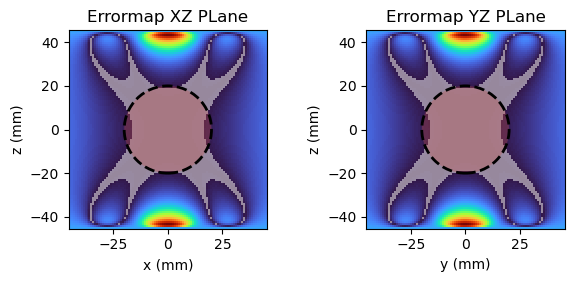

In [50]:
fig , (ax0, ax1) = plt.subplots(1, 2)
ax0.set_title("Errormap XZ PLane")
ax0.set_xlabel("x (mm)")
ax0.set_ylabel("z (mm)")
ax0.set_aspect(1)
ax0.pcolormesh(X, Z, err_xz, cmap="turbo")
r = 20
ax0.add_artist(plt.Circle((0, 0), r, alpha=0.3, linewidth=0, color="#ce5449", zorder=3))
ax0.add_artist(plt.Circle((0, 0), r, fill=False, linewidth=2, linestyle="dashed", zorder=3))
ax0.pcolormesh(X, Z, (err_xz)>0.05, cmap=my_cmap_gray, zorder=1)


ax1.set_title("Errormap YZ PLane")
ax1.set_xlabel("y (mm)")
ax1.set_ylabel("z (mm)")
ax1.set_aspect(1)
ax1.pcolormesh(Y, Z, err_yz, cmap="turbo")
r = 20
ax1.add_artist(plt.Circle((0, 0), r, alpha=0.3, linewidth=0, color="#ce5449", zorder=3))
ax1.add_artist(plt.Circle((0, 0), r, fill=False, linewidth=2, linestyle="dashed", zorder=3))
ax1.pcolormesh(Y, Z, (err_yz)>0.05, cmap=my_cmap_gray, zorder=1)

plt.subplots_adjust(wspace=0.5)
plt.show()